# Logistic Regression 
In this question, we will explore the use of Logistic Regression. We use MAGIC Gamma Telescope Data Set. The dataset can be found at https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. It has 19020 instances with 11 attributes. The task is to classify the instance as signal (target = 1, positive) or background (target = 0, negative).
The data have been split into training and test datasets. You can find them in the Q3&Q4 folder. Standardize the columns so they all have mean 0 and unit variance.

(a) (6 pts) Fit a ridge logistic regression (i.e., logistic regression with a ridge penalty) model using scikit learn package. Use 10-fold cross-validation to choose the strength of the regularization ('C' parameter). Maintain all other parameters as default. Report the mean error rate (fraction of incorrect labels) on both the training and test sets.

(b) (4 pts) Plot the receiver operating characteristic (ROC) curve on the test data. Report the area under the ROC curve (AUC).

Hint: see http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html  and 

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

In [17]:
## (a)
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
# load data
# train
train = pd.read_csv('Q3&Q4/magic_train.csv', header=None)
train_y = train.values[:,10]
train_x = train.values[:,:10]

# test
test = pd.read_csv('Q3&Q4/magic_test.csv', header=None)
test_y = test.values[:,10]
test_x = test.values[:,:10]

# standardize the data
train_x = preprocessing.scale(train_x)
test_x = preprocessing.scale(test_x)

kFold = 10
kf = KFold(n_folds=kFold)
lr = LogisticRegressionCV(penalty='l2', cv=kf)
lr.fit(train_x, train_y)
C_optimal = lr.C_[0]
print "The best C to Logistic Regression is", C_optimal

lr = LogisticRegression(penalty='l2', C=C_optimal)
lr.fit(train_x, train_y)

# mean error rates
train_MER = 1 - lr.score(train_x, train_y)
test_MER = 1 - lr.score(test_x, test_y)
print "Mean error rate for training data is: ", train_MER
print "Mean error rate for test data is: ", test_MER

The best C to Logistic Regression is 2.78255940221
Mean error rate for training data is:  0.211694762191
Mean error rate for test data is:  0.203768318214


The AUC for test data is: 0.847318037631


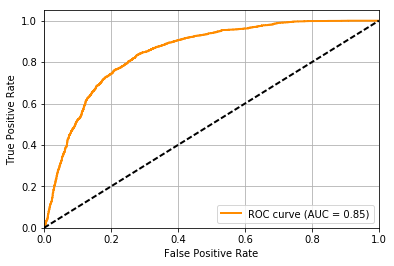

In [24]:
## (b)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

lr_predict_proba = lr.predict_proba(test_x)[:, 0]
fpr, tpr, _ = roc_curve(test_y, lr_predict_proba, pos_label='g')
roc_auc = auc(fpr, tpr)
print "The AUC for test data is:", roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machines
(a) (6 pts) Apply a linear SVM (kernel = 'linear'), using the scikit-SVM (http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) on the standardized MAGIC Gamma Telescope Data Set. The data have been split into training and test datasets. You can find them in the Q3&Q4 folder. Standardize the columns so they all have mean 0 and unit variance. Specify how you chose the cost penalty ('C' parameter) for the model. Maintain all other parameters as default. 

Hint: see http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier. (GridSearchCV is one way to select parameters for a model. You may use it in your answer, or you may use other ways to solve the problem.)

(b) (4 pts) Repeat (a) but using a Gaussian radial basis kernel (RBF kernel).

(c) (4 pts) Summarize the comparative performance (mean error rates on both the training and test sets) of all the classifiers (Ridge Logistic Regression, SVM with linear kernel, SVM with RBF kernel) that you applied to the MAGIC Gamma Telescope Data Set in this homework in a table. What do you conclude? (be brief)

In [25]:
## (a)
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# load data
# train
train = pd.read_csv('Q3&Q4/magic_train.csv', header=None)
train_y = train.values[:,10]
train_x = train.values[:,:10]

# test
test = pd.read_csv('Q3&Q4/magic_test.csv', header=None)
test_y = test.values[:,10]
test_x = test.values[:,:10]

# standardize the data
train_x = preprocessing.scale(train_x)
test_x = preprocessing.scale(test_x)


Cs = 10**np.linspace(-2, 2, 10)
hyperpara = {'C': Cs}

svc = SVC(kernel='linear')
gs = GridSearchCV(svc, hyperpara, cv=10)
gs.fit(train_x, train_y)

C_optimal = gs.best_params_['C']
svc = SVC(C=C_optimal, kernel='linear')
svc.fit(train_x, train_y)
# mean error rates
train_linear_MER = 1-svc.score(train_x, train_y)
test_linear_MER = 1-svc.score(test_x, test_y)
print "Mean error rate on training data is: ", train_linear_MER
print "Mean error rate on test data is: ", test_linear_MER

Mean error rate on training data is:  0.212522576761
Mean error rate on test data is:  0.201500348918


In [26]:
## (b)
svc = SVC(kernel='rbf')
gs = GridSearchCV(svc, hyperpara, cv=10)
gs.fit(train_x, train_y)

C_optimal = gs.best_params_['C']
svc = SVC(C=C_optimal, kernel='rbf')
svc.fit(train_x, train_y)
# mean error rates
train_rbf_MER = 1-svc.score(train_x, train_y)
test_rbf_MER = 1-svc.score(test_x, test_y)
print "Mean error rate on training data is: ", train_rbf_MER
print "Mean error rate on test data is: ", test_rbf_MER

Mean error rate on training data is:  0.101444912703
Mean error rate on test data is:  0.129797627355


# (c)
|                           | MER on training data | MER on test data |
|-------------------------- |----------------------| -----------------|
|Ridge Logistic Regression  | 0.211694762191       | 0.201500348918   |
|SVM with linear kernel     | 0.212522576761       | 0.201500348918   |
|SVM with RBF kernel        | 0.101444912703       | 0.129797627355   |

From the table, SVM with RBF kernal has the best performance.